In [22]:
import dlib
import numpy as np
import cv2
from urllib.request import urlopen
import matplotlib.pyplot as plt

In [23]:
frontaface_detector=dlib.get_frontal_face_detector()
landmark_predictor=dlib.shape_predictor('data/shape_predictor_68_face_landmarks.dat')

In [24]:
def get_landmarks(image_url) :
#     try :
#         url_response=urlopen(image_url)
#         img_array=np.array(bytearray(url_response.read()),dtype=np.uint8)
#         image=cv2.imdecode(img_array,-1)
#         print(1)
#     except:
#         print('Whoops')
#         return None,None
    url_response=urlopen(image_url)
    img_array=np.array(bytearray(url_response.read()),dtype=np.uint8)
    image=cv2.imdecode(img_array,-1)

    faces=frontaface_detector(image,1)
    if len(faces):
        landmarks = [(p.x, p.y) for p in landmark_predictor(image, faces[0]).parts()]
    else :
        return None, None
    return image,landmarks

In [27]:
def image_landmarks(image,face_landmarks):
    radius=-1
    circle_thickness=4
    image_copy=image.copy()
    for (x,y) in face_landmarks:
        cv2.circle(image_copy,(x,y),circle_thickness, (255,0,0),radius)
        plt.imshow(image_copy,interpolation='nearest')
        plt.axis('off')
        plt.show()

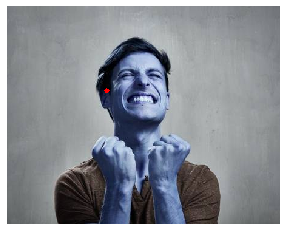

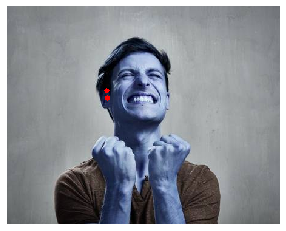

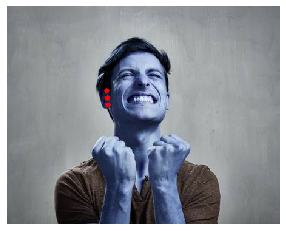

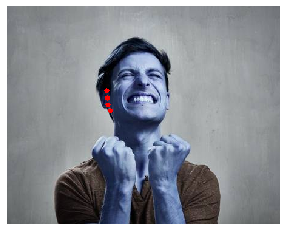

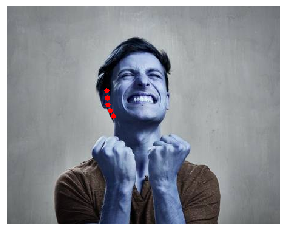

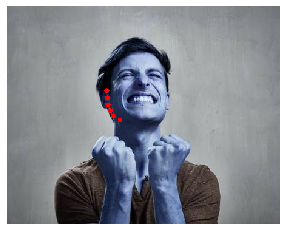

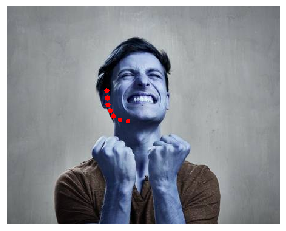

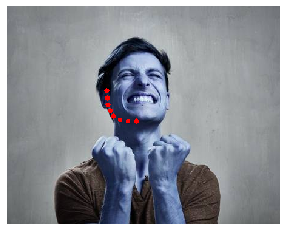

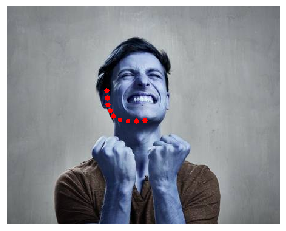

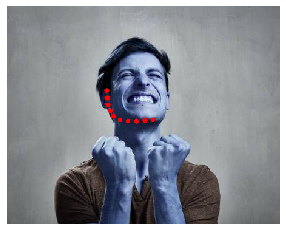

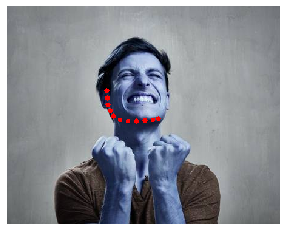

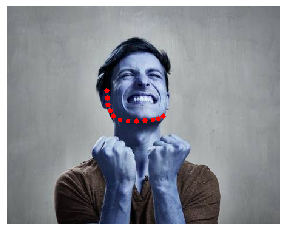

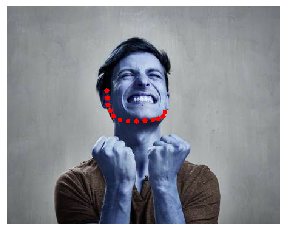

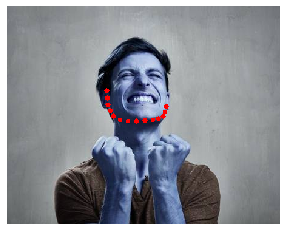

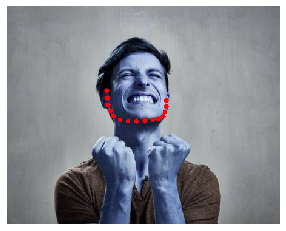

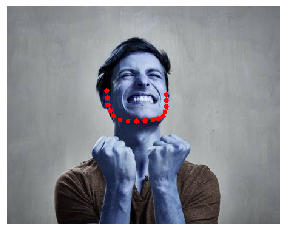

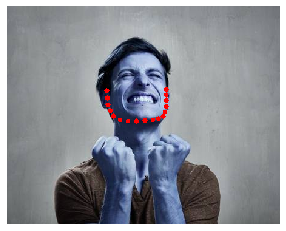

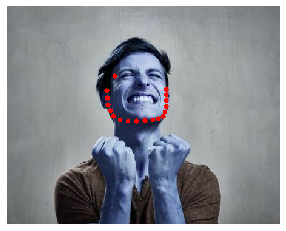

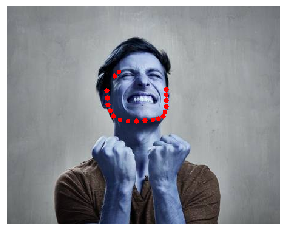

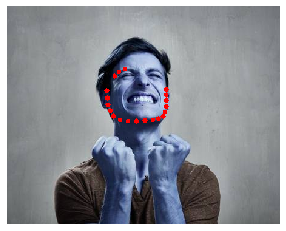

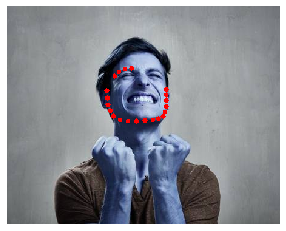

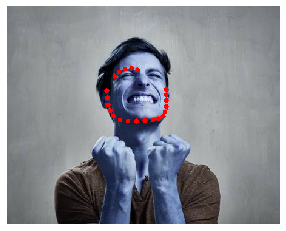

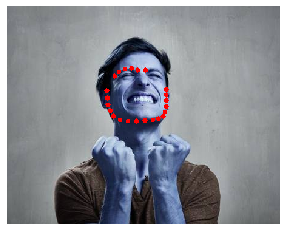

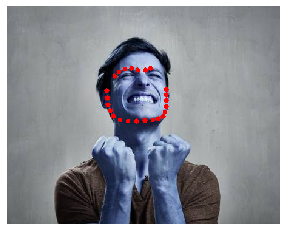

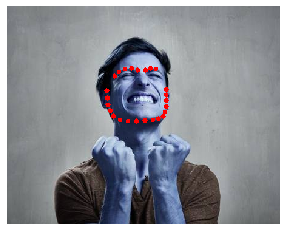

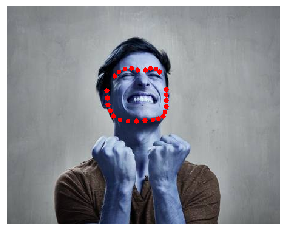

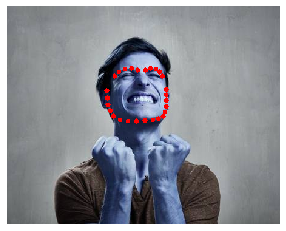

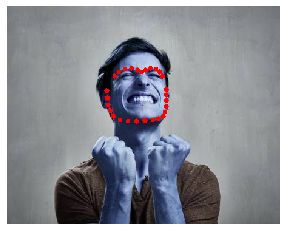

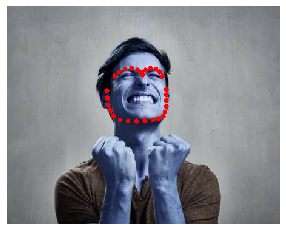

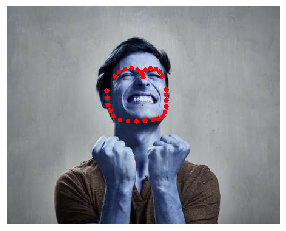

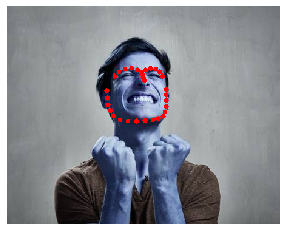

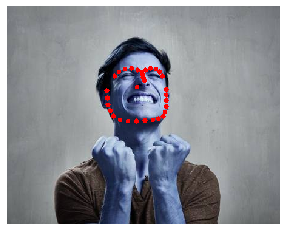

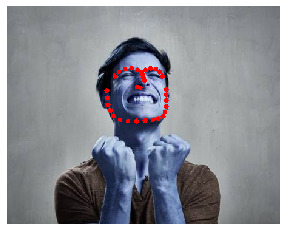

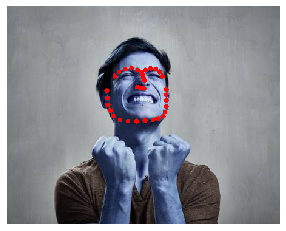

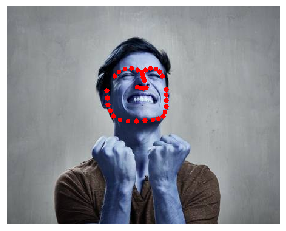

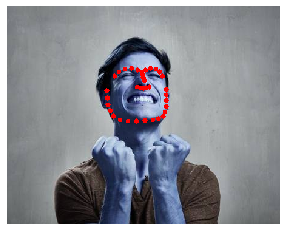

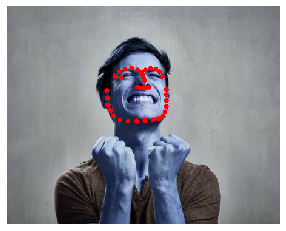

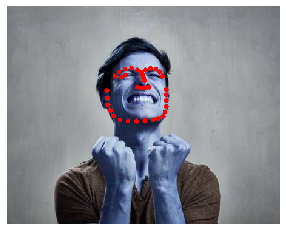

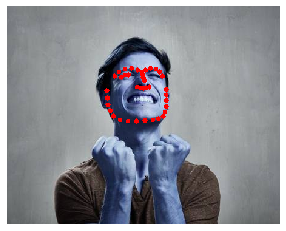

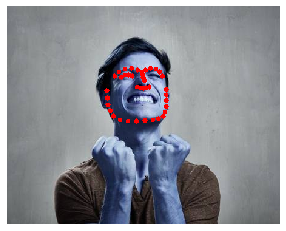

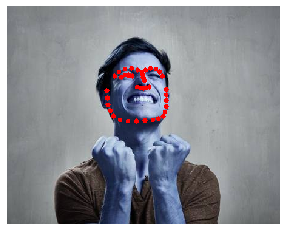

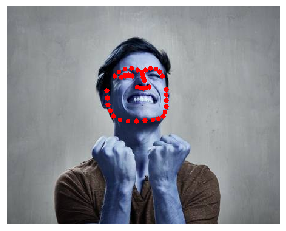

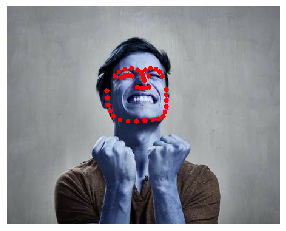

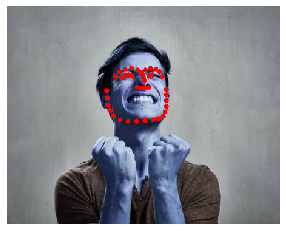

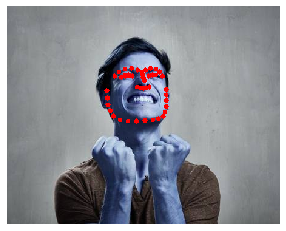

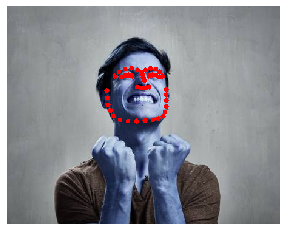

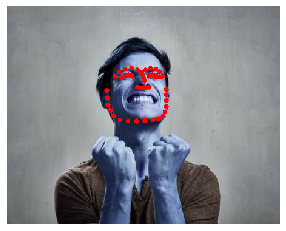

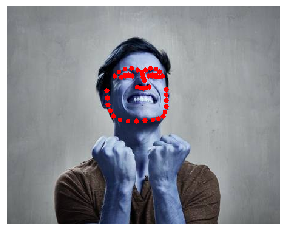

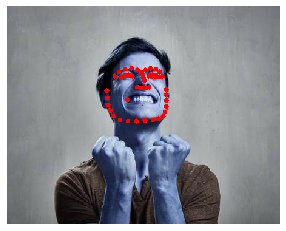

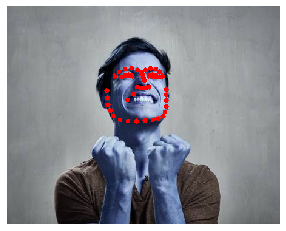

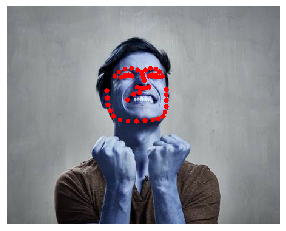

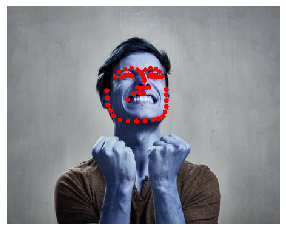

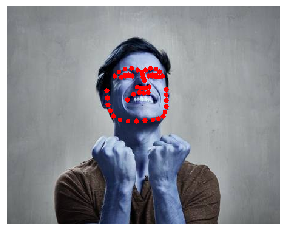

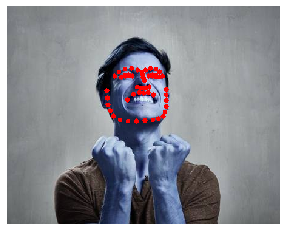

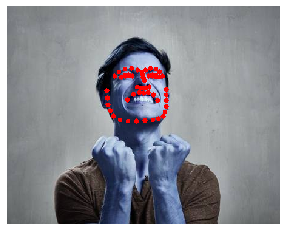

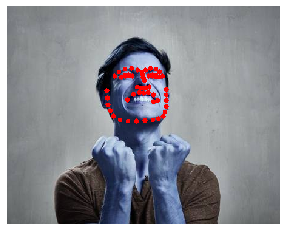

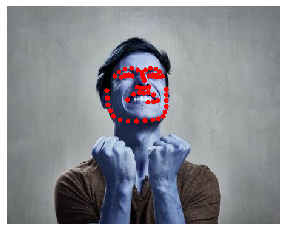

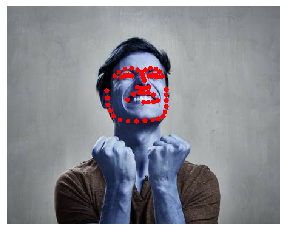

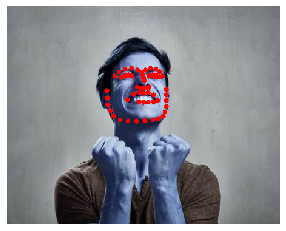

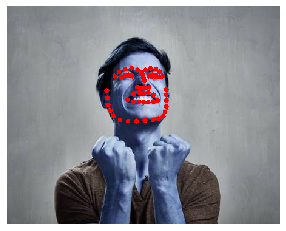

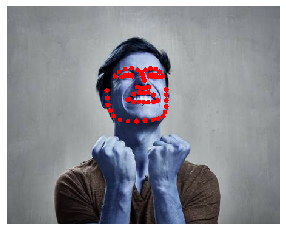

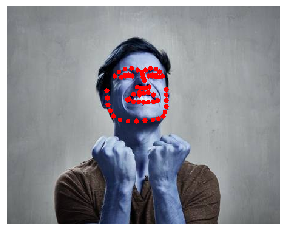

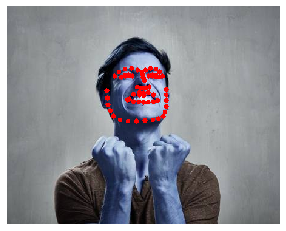

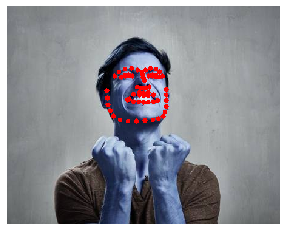

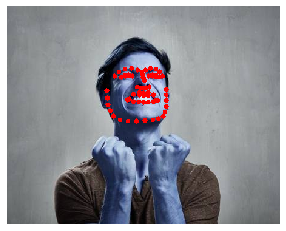

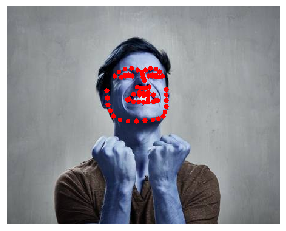

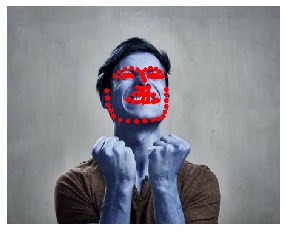

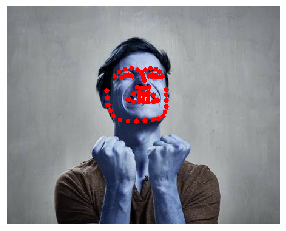

In [30]:
url='https://us.123rf.com/450wm/kurhan/kurhan1612/kurhan161200316/66944864-happy-excited-young-man-over-gray-wall-background.jpg?ver=6'
image,landmarks=get_landmarks(url)
image_landmarks(image,landmarks)